In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
# %matplotlib widget
plt
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [7]:
def custom_softmax(z):
    ez = np.exp(z)
    print(ez)
    sm = ez / np.sum(ez)
    return sm

[ 2.72  7.39 20.09 54.6 ]


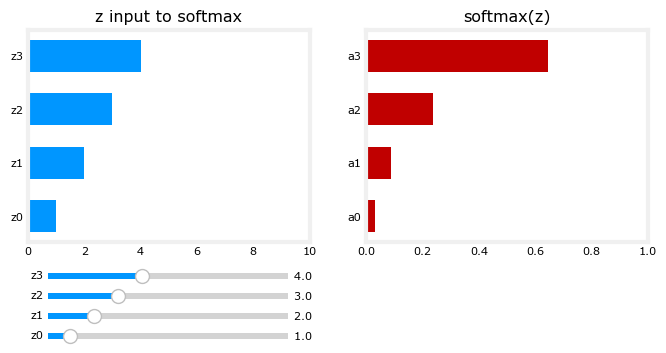

In [8]:
plt.close("all")
plt_softmax(custom_softmax)

In [16]:
# make dataset for example
centers = [[-5,2], [-2, -2], [1, 2], [5, -2]]
print(centers)
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state=42)
print(X_train.shape, y_train.shape)

[[-5, 2], [-2, -2], [1, 2], [5, -2]]
(2000, 2) (2000,)


In [21]:
model = Sequential(
    [Dense(25, activation = 'relu'),
     Dense(15, activation = 'relu'),
     Dense(4, activation = 'softmax')]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
63/63 [==============================] - 0s 3ms/step - loss: 1.1614
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4228
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.1827
Epoch 4/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1075
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0790
Epoch 6/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0650
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0566
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0469
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0444


In [30]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred[:2])
print("largest value", np.max(p_nonpreferred))
print("smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 1ms/step
[[9.30e-06 2.47e-07 1.00e+00 4.63e-06]
 [8.81e-01 2.20e-04 1.18e-01 3.13e-04]]
largest value 0.9999993
smallest value 6.388027e-09


In [32]:
preferred_model = Sequential(
    [Dense(25, activation = 'relu'),
     Dense(15, activation = 'relu'),
     Dense(4, activation = 'linear')]
)

preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)
preferred_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
63/63 [==============================] - 0s 3ms/step - loss: 0.8229
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.2968
Epoch 3/10
63/63 [==============================] - 0s 3ms/step - loss: 0.1438
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0724
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0613
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0545
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0501
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0437


In [34]:
p_preferred = preferred_model.predict(X_train)
print(f"two examples of p_preferred: {p_preferred[:2]}")
print("largest value", np.max(p_preferred))
print("smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 2ms/step
two examples of p_preferred: [[-1.01 -6.11 10.77 -2.71]
 [ 5.35 -2.65  3.73 -1.92]]
largest value 13.190749
smallest value -7.9722853


In [35]:
for i in range(5):
    print(f"{[p_preferred[i]]}, category: {np.argmax(p_preferred[i])}")

[array([-1.01, -6.11, 10.77, -2.71], dtype=float32)], category: 2
[array([ 5.35, -2.65,  3.73, -1.92], dtype=float32)], category: 0
[array([-1.6 ,  9.59, -7.  , -3.16], dtype=float32)], category: 1
[array([-1.76, -2.9 ,  4.79,  0.39], dtype=float32)], category: 2
[array([ 7.43,  0.08, -1.04, -1.82], dtype=float32)], category: 0
